In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('qz_andr.csv')
train.head()

,is_reg,tags
0,1,"0ww000,0wwq00,0wce00,0qyr00,0qrw00,0eu000,0e00..."
1,1,"0wyq00,0wqu00,0qzq00,0wq000,0wuu00,0wy000,0wui..."
2,1,"0wyq00,0wq000,0wy000,0wuu00,0we000,0wui00,0qzw..."
3,1,"0ww000,0wyr00,0qrq00,0qiq00,0qew00,0qei00,0wiq..."
4,1,"0wyq00,0qyr00,0qzr00,0wuu00,0wy000,0woq00,0wo0..."


In [3]:
from tag_num import TagsNum
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import FeatureUnion

combined_feature = FeatureUnion([('token', CountVectorizer()),
                                ('count', TagsNum())])

In [4]:
X_features = combined_feature.fit(train['tags'], train['is_reg']).transform(train['tags'])

In [5]:
from sklearn.model_selection import train_test_split
X = X_features.toarray()
y = train['is_reg']

X_train, X_valid, y_train, y_valid = train_test_split(X,y,
                                                      stratify=y,
                                                      test_size = 0.3,
                                                     random_state = 123)

In [6]:
from xgboost import XGBClassifier

clf = XGBClassifier(max_depth=2,
                    learning_rate = 0.5,
                    n_estimators= 10,
                    subsample= 0.5,
                    n_jobs = 8,
                          colsample_bytree = 0.7,
#                           {'eval_metric': 'auc'},
                          seed = 123,
                         )

In [19]:
bst = XGBClassifier(n_jobs = 8, eval_metric = 'auc', random_state=123)
params = {
    'max_depth':[2,3,5],
    'learning_rate':[0.01,0.05,0.1,0.5],
    'n_estimators':[5,10,20,50],
    'subsample':[0.3,0.5,0.7,0.9],
    'colsample_bytree':[0.3,0.5,0.7],
    'reg_alpha':[0,1],
}

from sklearn.model_selection import GridSearchCV
clf_search = GridSearchCV(bst,params).fit(X, y)

In [22]:
clf_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, eval_metric='auc', gamma=0, learning_rate=0.5,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=50, n_jobs=8, nthread=None,
       objective='binary:logistic', random_state=123, reg_alpha=3,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.7)

In [21]:
clf = XGBClassifier(max_depth=2,
                    learning_rate = 0.5,
                    n_estimators= 10,
                    subsample= 0.5,
                    n_jobs = 8,
                          colsample_bytree = 0.7,
#                           {'eval_metric': 'auc'},
                          seed = 123,
                         )

xgboost.sklearn.XGBClassifier

In [ ]:
XGBClassifier()

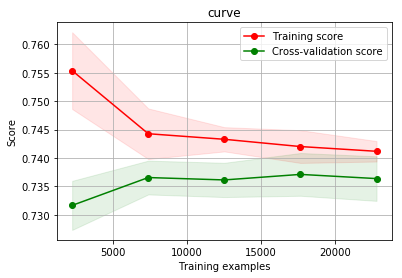

In [10]:
from plot_learning_curve import *
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits = 10, test_size = 0.3, random_state = 0)
learning_curve = plot_learning_curve(clf,'curve',X, y,cv=cv, n_jobs=8)
learning_curve.show()

In [17]:
from sklearn2pmml import PMMLPipeline, FeatureUnion
from tag_num import TagsNum
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier

In [11]:

pipeline = PMMLPipeline([
    ('feature_engineer', FeatureUnion([
        ('token', CountVectorizer()),
        ('count', TagsNum())
    ])),
    ('clf', XGBClassifier(max_depth=2,
                          learning_rate = 0.3,
                          n_estimators= 10, 
                          subsample= 0.5, 
                          colsample_bytree = 0.8,
                          eval_metric = 'auc',
                          seed = 123,
                         ))
])

In [12]:
pipeline.fit(train['tags'], train['is_reg'])

PMMLPipeline(steps=[('feature_engineer', FeatureUnion(n_jobs=1,
       transformer_list=[('token', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('count', TagsNum())],
       transformer_weights=None)),
       ('clf', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, eval_metric='auc', gamma=0, learning_rate=0.3,
       max_delta_step=0, max_depth=2, min_child_weight=1, missing=None,
       n_estimators=10, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=123, silent=True,
       subsample=0.5))])

In [13]:
from sklearn.metrics import roc_auc_score

y_pred = pipeline.predict_proba(train['tags'])[:,1]
roc_auc_score(train['is_reg'],y_pred)

0.74930061165581141

In [38]:
from sklearn2pmml import sklearn2pmml

# sklearn2pmml(pipeline, 'xgb.pmml', debug= True)

In [28]:
test = pd.read_csv('cheetah_12221722.csv')
test['a60'][test['a60'] != 1.] = 0
test['a40'][test['a40'] != 1.] = 0

/Users/LGB/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/LGB/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
from sklearn.metrics import roc_auc_score

y_pred = pipeline.predict_proba(test['tags'])[:,1]
roc_auc_score(test['a40'],y_pred), roc_auc_score(test['a60'],y_pred)

(0.50807088933259004, 0.57392856804262504)

In [55]:
test_features = combined_feature.transform(test['tags'])
X_test = test_features.toarray()
y = test['a40']
test_pred = clf.predict_proba(X_test)[:,1]
roc_auc_score(test['a40'],test_pred)

0.51096689111936833

In [56]:
test_features = combined_feature.transform(test['tags'])
X_test = test_features.toarray()
y = test['a60']
test_pred = clf.predict_proba(X_test)[:,1]
roc_auc_score(test['a60'],test_pred)

0.58009851580424354